## Práctica 5. Reducción de dimensionalidad

### ¿Se guardan las relaciones semánticas?
Cada método de reducción de la dimensionalidad utiliza criterios muy distintos para lograr una dimensionalidad menor, esto causa un impacto inevitable en las diferencias entre los resultados obtenidos con los distintos métodos empleados, por lo que las relaciones semánticas entre las palabras no preservan las mismas características.

### ¿Qué método de reducción de dimensionalidad consideras que es mejor?
Pienso que no se puede concluir que un método es superior a otro, ya que éstos resuelven la problemática de una manera distinta, no sería muy atinado compararlos en base un sólo criterio particular, más bien, parece más adecuado concluir que cada método es apropiado para cierto rango de situaciones.

In [ ]:
%pip install numpy pandas matplotlib gensim nltk scipy

In [ ]:
"""
Simplest word2vec model
"""

from gensim.models import Word2Vec

import logging

# enable logging for monitoring training
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# sample data
# list of normalized sentences
sentences = [
    ["cat", "sat", "on", "the", "mat"],
    ["dog", "barked", "at", "the", "mailman"],
    ["the", "quick", "brown", "fox", "jumps", "over", "the", "lazy", "dog"]
]

# perform training
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# fecth vector for some particular word
print(model.wv['cat'])

# save model
model.save("word2vec.model")

# test re-loading the model
loaded_model = Word2Vec.load("word2vec.model")
print(loaded_model.wv['dog'])


[ 7.6966463e-03  9.1206422e-03  1.1355019e-03 -8.3250795e-03
  8.4250160e-03 -3.6962307e-03  5.7421732e-03  4.3915794e-03
  9.6899448e-03 -9.2934975e-03  9.2084054e-03 -9.2815282e-03
 -6.9077122e-03 -9.1021946e-03 -5.5471100e-03  7.3688962e-03
  9.1644777e-03 -3.3253515e-03  3.7230505e-03 -3.6252034e-03
  7.8814710e-03  5.8668759e-03  2.0861626e-07 -3.6286747e-03
 -7.2243060e-03  4.7686161e-03  1.4529788e-03 -2.6131857e-03
  7.8378068e-03 -4.0496145e-03 -9.1489861e-03 -2.2554707e-03
  1.2514711e-04 -6.6392552e-03 -5.4866159e-03 -8.4997769e-03
  9.2298733e-03  7.4240281e-03 -2.9524326e-04  7.3676636e-03
  7.9507884e-03 -7.8357337e-04  6.6120909e-03  3.7675237e-03
  5.0768424e-03  7.2529912e-03 -4.7393893e-03 -2.1855331e-03
  8.7312341e-04  4.2362059e-03  3.3043313e-03  5.0958274e-03
  4.5864857e-03 -8.4385090e-03 -3.1838394e-03 -7.2367596e-03
  9.6814223e-03  5.0065992e-03  1.7084122e-04  4.1129780e-03
 -7.6561309e-03 -6.2946510e-03  3.0763936e-03  6.5346383e-03
  3.9498745e-03  6.01802

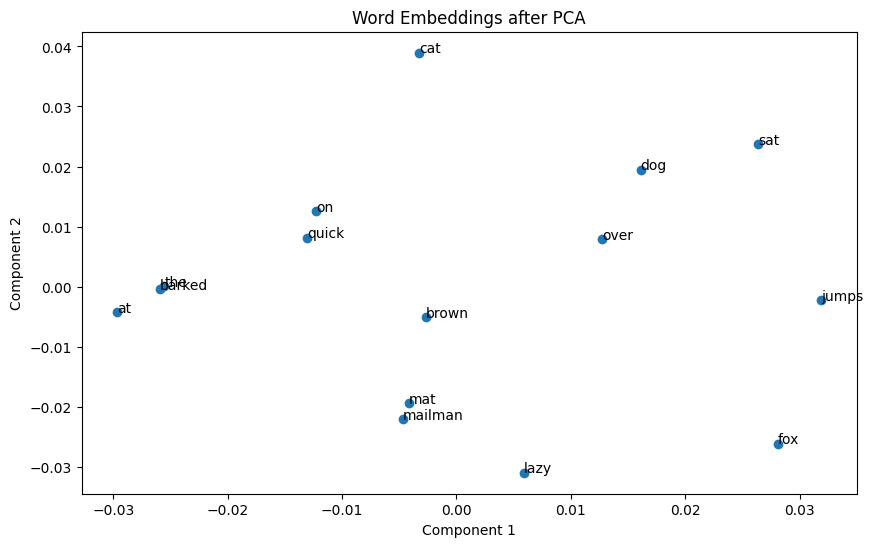

In [ ]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import logging

# Enable logging for monitoring training
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Sample data: list of lists of words
sentences = [
    ["cat", "sat", "on", "the", "mat"],
    ["dog", "barked", "at", "the", "mailman"],
    ["the", "quick", "brown", "fox", "jumps", "over", "the", "lazy", "dog"]
]

# Train a Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Fit PCA model to the word vectors
words = list(model.wv.index_to_key)
word_vectors = [model.wv[word] for word in words]
pca = PCA(n_components=2)
word_vectors_reduced = pca.fit_transform(word_vectors)

# Plot the reduced word vectors
plt.figure(figsize=(10, 6))
plt.scatter(word_vectors_reduced[:, 0], word_vectors_reduced[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_reduced[i, 0], word_vectors_reduced[i, 1]))
plt.title('Word Embeddings after PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


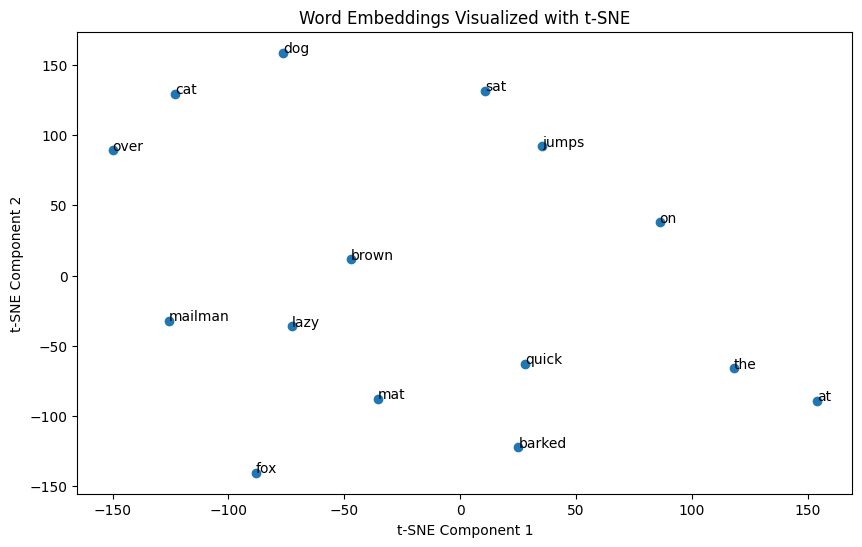

In [ ]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Example sentences
sentences = [
    ["cat", "sat", "on", "the", "mat"],
    ["dog", "barked", "at", "the", "mailman"],
    ["the", "quick", "brown", "fox", "jumps", "over", "the", "lazy", "dog"]
]

# Train a Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Retrieve word vectors
words = list(model.wv.index_to_key)
word_vectors = np.array([model.wv[word] for word in words])

# Apply t-SNE with adjusted perplexity
tsne = TSNE(n_components=2, random_state=0, perplexity=len(word_vectors)/3)  # Reduce perplexity here
word_vectors_reduced_tsne = tsne.fit_transform(word_vectors)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(word_vectors_reduced_tsne[:, 0], word_vectors_reduced_tsne[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_reduced_tsne[i, 0], word_vectors_reduced_tsne[i, 1]))
plt.title('Word Embeddings Visualized with t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


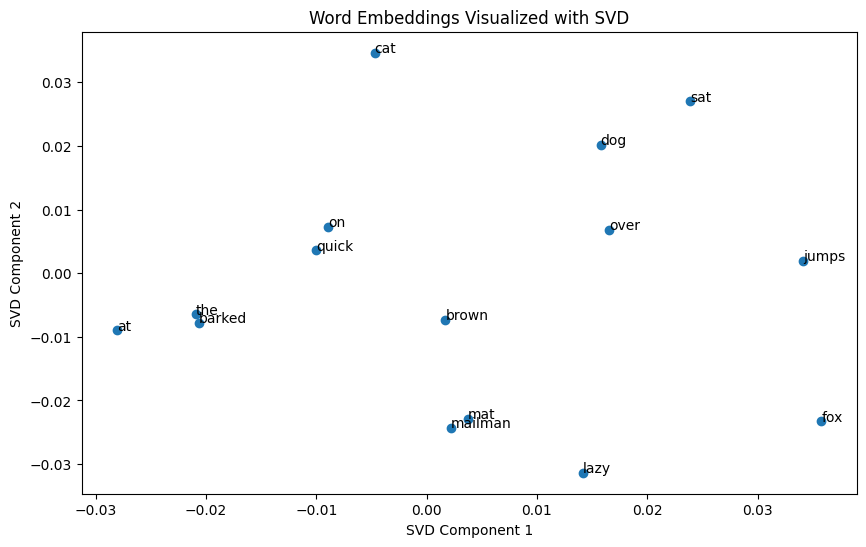

In [ ]:
from gensim.models import Word2Vec
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Example sentences
sentences = [
    ["cat", "sat", "on", "the", "mat"],
    ["dog", "barked", "at", "the", "mailman"],
    ["the", "quick", "brown", "fox", "jumps", "over", "the", "lazy", "dog"]
]

# Train a Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Retrieve word vectors
words = list(model.wv.index_to_key)
word_vectors = [model.wv[word] for word in words]

# Apply Truncated SVD
svd = TruncatedSVD(n_components=2)
word_vectors_reduced_svd = svd.fit_transform(word_vectors)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(word_vectors_reduced_svd[:, 0], word_vectors_reduced_svd[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_reduced_svd[i, 0], word_vectors_reduced_svd[i, 1]))
plt.title('Word Embeddings Visualized with SVD')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.show()
